In [ ]:
"""
RNN

1. A major characteristic of the neural networks such as densely connected networks and convnets, is that they have no memory.
   Each input shown to them is processed independently, with no state kept in between inputs. With such networks, in order to process
   a sequence or a temporal series of data points, you have to show the entire sequence to the network at once: turn it into a single
   data point. For instance,  in the IMDB example: an entire movie review was transformed into a single large vector and processed
   in one go. Such networks are called feedforward networks.

2. Biological intelligence processes information incrementally while maintaining an internal model of what it’s processing, built from
   past information and constantly updated as new information comes in.

3. A recurrent neural network (RNN) adopts the same principle, albeit in an extremely simplified version: it processes sequences by
   iterating through the sequence elements and maintaining a state containing information relative to what it has seen so far. In effect,
   an RNN is a type of neural network that has an internal loop. The state of the RNN is reset between processing two different, independent
   sequences (such as two different IMDB reviews), so you still consider one sequence a single data point: a single input to the network.
   What changes is that this data point is no longer processed in a single step; rather, the network internally loops over sequence elements.
"""

In [1]:
"""
NumPy version of RNN

The RNN takes as input a sequence of vectors, which you’ll encode as a 2D tensor of size (timesteps, input_features). It loops over
timesteps, and at each timestep, it considers its current state at t and the input at t (of shape (input_features,), and combines them to
obtain the output at t. You’ll then set the state for the next step to be this previous output. For the first timestep, the previous
output isn’t defined; hence, there is no current state. So, you’ll initialize the state as an allzero vector called the initial
state of the network.
"""
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

# input data
inputs = np.random.random((timesteps, input_features))

# inital vector
state_t = np.zeros((output_features,))

# weight matrix
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

# rnn
successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)
print(final_output_sequence)

[0.99999994 0.99999999 0.99999998 ... 1.         1.         1.        ]


In [2]:
"""
A recurrent layer in Keras

1. There is one minor difference: SimpleRNN processes batches of sequences, like all other Keras layers, not a single sequence as
   in the Numpy example. This means it takes inputs of shape (batch_size, timesteps, input_features), rather than
   (timesteps, input_features). Like all recurrent layers in Keras, SimpleRNN can be run in two different modes: it can return either
   the full sequences of successive outputs for each timestep (a 3D tensor of shape (batch_size, timesteps, output_features))
   or only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features)).
   These two modes are controlled by the return_sequences constructor argument.

2. It’s sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. 
"""
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

# last output for each input sequence
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
print(model.summary())

# full sequences of successive outputs for each timestep
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
print(model.summary())

# stack several recurrent layers
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32)) # last layer only returns the last output
print(model.summary())

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________
None
______________________________________________________

In [3]:
"""
IMDB moive-review-classification using simplernn (1)
"""
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 16s 779us/step - loss: 0.6215 - acc: 0.6402 - val_loss: 0.5519 - val_acc: 0.7226
Epoch 2/10
20000/20000 [==============================] - 15s 764us/step - loss: 0.3936 - acc: 0.8352 - val_loss: 0.3666 - val_acc: 0.8472
Epoch 3/10
20000/20000 [==============================] - 15s 768us/step - loss: 0.2900 - acc: 0.8842 - val_loss: 0.3706 - val_acc: 0.8478
Epoch 4/10
20000/20000 [==============================] - 15s 764us/step - loss: 0.2152 - acc: 0.9195 - val_loss: 0.4439 - val_acc: 0.7896
Epoch 5/10
20000/20000 [==============================] - 15s 762us/step - loss: 0.1555 - acc: 0.9428 - val_loss: 0.4055 - val_acc: 0.8294
Epoch 6/10
20000/20000 [==============================] - 15s 764us/step - loss: 0.1032 - acc: 0.9655 - val_loss: 0.4045 - val_acc: 0.8662
Epoch 7/10
20000/20000 [==============================] - 15s 767us/step - loss: 0.0692 - acc: 0.9786 - val_loss: 0.4

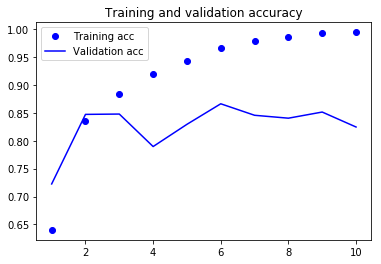

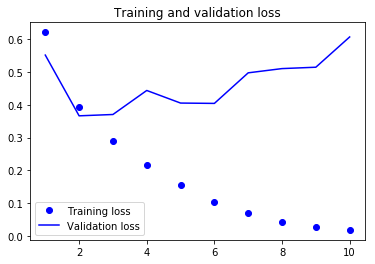

In [5]:
"""
IMDB moive-review-classification using simplernn (2)
"""
from keras.layers import Dense
import matplotlib.pyplot as plt

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
"""
LSTM & GRU


1. SimpleRNN isn’t the only recurrent layer available in Keras. There are two others: LSTM and GRU. In practice, you’ll always use
   one of these, because SimpleRNN is generally too simplistic to be of real use. SimpleRNN has a major issue: although it should
   theoretically be able to retain at time t information about inputs seen many timesteps before, in practice, such long-term dependencies
   are impossible to learn. This is due to the vanishing gradient problem, an effect that is similar to what is observed with
   non-recurrent networks (feedforward networks) that are many layers deep: as you keep adding layers to a network,
   the network eventually becomes untrainable.

2. The LSTM layer is a variant of the SimpleRNN layer you already know about; it adds a way to carry information across many timesteps.
   Imagine a conveyor belt running parallel to the sequence you’re processing. Information from the sequence can jump onto the
   conveyor belt at any point, be transported to a later timestep, and jump off, intact, when you need it. This is essentially what
   LSTM does: it saves information for later, thus preventing older signals from gradually vanishing during processing.

3. An additional data flow that carries information across timesteps. Call its values at different timesteps Ct, where C stands for carry.
   This information will have the following impact on the cell: it will be combined with the input connection and the recurrent connection
   (via a dense transformation: a dot product with a weight matrix followed by a bias add and the application of an activation function),
   and it will affect the state being sent to the next timestep (via an activation function an a multiplication operation). Conceptually,
   the carry dataflow is a way to modulate the next output and the next state.

4. Pseudocode details of the LSTM:
   -- output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)
   -- i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
      f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
      k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)
   -- c_t+1 = i_t * k_t + c_t * f_t

5.  You can say that multiplying c_t and f_t is a way to deliberately forget irrelevant information in the carry dataflow. Meanwhile,
    i_t and k_t provide information about the present, updating the carry track with new information. But at the end of the day, these
    interpretations don’t mean much, because what these operations actually do is determined by the contents of the weights parameterizing
    them; and the weights are learned in an end-to-end fashion, starting over with each training round, making it impossible to credit
    this or that operation with a specific purpose. The specification of an RNN cell determines your hypothesis space—the space in which
    you’ll search for a good model configuration during training—but it doesn’t determine what the cell does; that is up to the cell
    weights. The same cell with different weights can be doing very different things. So the combination of operations making up an RNN
    cell is better interpreted as a set of constraints on your search, not as a design in an engineering sense.

6.  To a researcher, it seems that the choice of such constraints—the question of how to implement RNN cells—is better left to optimization
    algorithms (like genetic algorithms or reinforcement learning processes) than to human engineers. And in the future, that’s how we’ll
    build networks. In summary: you don’t need to understand anything about the specific architecture of an LSTM cell; as a human,
    it shouldn’t be your job to understand it. Just keep in mind what the LSTM cell is meant to do: allow past information to be
    reinjected at a later time, thus fighting the vanishing-gradient problem. 
"""

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.5057 - acc: 0.7608 - val_loss: 0.3195 - val_acc: 0.8768
Epoch 2/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.2896 - acc: 0.8876 - val_loss: 0.3574 - val_acc: 0.8450
Epoch 3/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.2329 - acc: 0.9124 - val_loss: 0.3850 - val_acc: 0.8526
Epoch 4/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.2026 - acc: 0.9248 - val_loss: 0.2929 - val_acc: 0.8796
Epoch 5/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.1728 - acc: 0.9368 - val_loss: 0.3363 - val_acc: 0.8776
Epoch 6/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.1598 - acc: 0.9419 - val_loss: 0.3413 - val_acc: 0.8494
Epoch 7/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.1436 - acc: 0.9500 - val_loss: 0.3710 - val_acc:

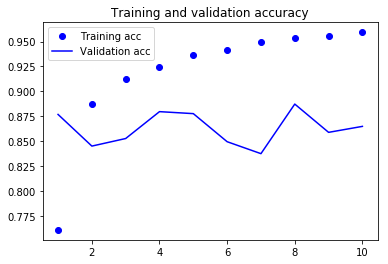

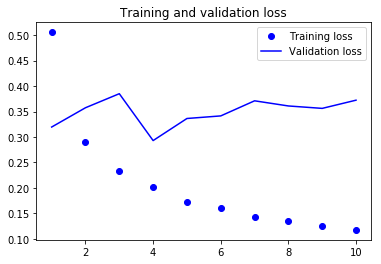

In [6]:
"""
LSTM in Keras

The network is similar to the one with SimpleRNN that was just presented. You only specify the output dimensionality of the LSTM layer;
leave every other argument (there are many) at the Keras defaults.
"""
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
"""
The result isn’t groundbreaking for such a computationally intensive approach. Why isn’t LSTM performing better? One reason is that
you made no effort to tune hyperparameters such as the embeddings dimensionality or the LSTM output dimensionality. Another may be lack
of regularization. But honestly, the primary reason is that analyzing the global, long-term structure of the reviews (what LSTM is good
at) isn’t helpful for a sentiment-analysis problem. Such a basic problem is well solved by looking at what words occur in each review,
and at what frequency. That’s what the first fully connected approach looked at. But there are far more difficult natural language
processing problems out there, where the strength of LSTM will become apparent: in particular, question-answering and machine translation.

"""